# **Mini-Projeto: Análise Exploratória de Carros à Venda na Alemanha**

Você é um analista de dados em Frankfurt e você foi alocado no time de vendas. Sua tarefa é analisar um dataset com os detalhes de carros que estão à venda na Alemanha através do eBay.

Após uma conversa inicial, foram alinhadas as seguintes perguntas de negócio:


1.   Qual a distribuição de carros de acordo com o ano de registro?
2.   Avalie se existem valores discrepantes nas variações dos preços de venda de acordo com a marca.
1.   Qual o número de veículos pertencentes a cada tipo de combustível?
2.   Qual o preço médio dos veículos de acordo com o tipo de caixa de câmbio e o tipo de combustível?
2.   Quais os tipos de veículos com a maior potência média?
1.   Avalie o preço médio de um veículo por marca, bem como tipo de veículo

*Disclaimer:* o conjunto de dados "autos" foi retirado diretamento do Kaggle, baixado a partir do [GitHub da Data Science Academy](http://github.com/dsacademybr). A descrição do mini-projeto e as perguntas de negócio foram baseadas no Curso [Python Fundamentos para Análise de Dados](https://www.datascienceacademy.com.br), curso GRATUITO e muito complexo que recomendo e todos(as) que queiram aprender Python.










In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
# Carregando o dataset
df = pd.read_csv("autos.csv", sep = ',')

Processo de preparação e exploração dos dados

In [ ]:
# Identificação das variáveis
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435.0,2016-04-07 03:16:57,2016.0,2016.0,March,March,14.0,3.0,23.0,11.0
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954.0,2016-04-07 01:46:50,2016.0,2016.0,March,March,14.0,1.0,5.0,7.0
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480.0,2016-04-04 12:47:46,2016.0,2016.0,March,March,22.0,12.0,12.0,4.0
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074.0,2016-03-17 17:40:17,2016.0,2016.0,March,March,0.0,17.0,15.0,5.0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437.0,2016-04-06 10:17:21,2016.0,2016.0,March,March,6.0,10.0,8.0,5.0


In [ ]:
# Resumo das variáveis numéricas
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,111572.000000,111572.000000,111572.000000,111572.000000,111571.000000,111571.000000,111571.0,111571.000000,111571.000000,111571.000000,111571.000000
mean,3892.550416,2001.902449,108.974178,131347.739576,50305.381730,2015.999901,2016.0,8.549587,11.833514,14.097516,6.238799
std,4150.605935,6.743220,181.673612,34988.284217,25783.510231,0.009929,0.0,8.568287,6.506830,6.743240,3.457548
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29614.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2450.000000,2002.000000,103.000000,150000.000000,49143.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5390.000000,2006.000000,140.000000,150000.000000,70806.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,19211.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


Tratamento de valores missing

In [ ]:
df.isna().sum()

dateCrawled             0
name                    0
seller                  0
offerType               0
price                   0
abtest                  0
vehicleType             0
yearOfRegistration      0
gearbox                 0
powerPS                 0
model                   0
kilometer               0
monthOfRegistration     0
fuelType               68
brand                   0
notRepairedDamage       0
dateCreated             0
postalCode              1
lastSeen                1
yearOfCreation          1
yearCrawled             1
monthOfCreation         1
monthCrawled            1
NoOfDaysOnline          1
NoOfHrsOnline           1
yearsOld                1
monthsOld               1
dtype: int64

*Como é possível perceber, existem  189 registros NA de tipo de combustível (fuelType), essa informação será
importante quando chegarmos à pergunta 4, onde esta variável será utilizada.*

*Tratamento de outliers:
Os outliers serão tratados na questão dois, quando avaliarmos valores discrepantes.*

**1.   Qual a distribuição de carros de acordo com o ano de registro?**

Vamos primeiro avaliar numericamente as quantidades:

In [ ]:
df['yearOfRegistration'].describe()

count    111572.000000
mean       2001.902449
std           6.743220
min        1910.000000
25%        1998.000000
50%        2002.000000
75%        2006.000000
max        2016.000000
Name: yearOfRegistration, dtype: float64

Text(0, 0.5, 'Quantidade')

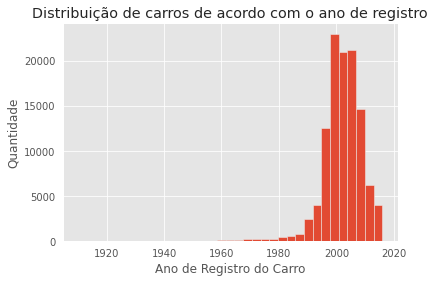

In [ ]:
plt.hist(df['yearOfRegistration'], bins = 35)
plt.title("Distribuição de carros de acordo com o ano de registro")
plt.xlabel('Ano de Registro do Carro')
plt.ylabel('Quantidade')

*É possível concluir que a grande maioria dos carros foi fabricada entre os anos 90 e 2000.*

**2.   Avalie se existem valores discrepantes nas variações dos preços de venda de acordo com a marca.**

Text(0, 0.5, 'Preço de Venda')

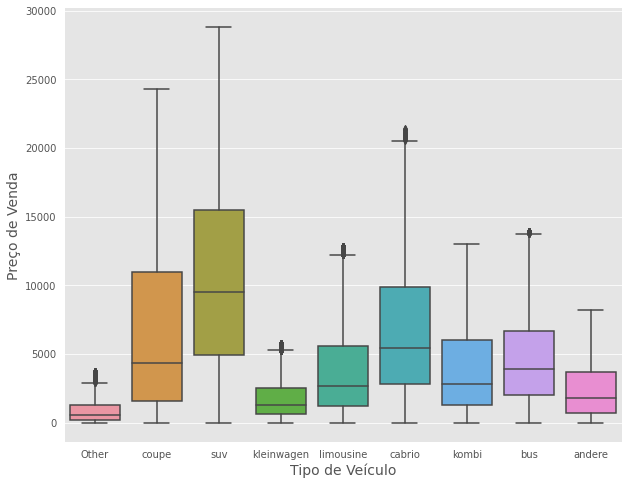

In [ ]:
ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = df['vehicleType'], y = df['price'])
plt.xlabel("Tipo de Veículo", size = 14)
plt.ylabel("Preço de Venda", size = 14)

*Os veículos do tipo Cupê (coupe), SUV (suv) e Conversível (cabrio) são o que possuem os maiores outliers, com carros sendo vendidos por mais que o dobro ou triplo da mediana.*

**3. Qual o número de veículos pertecentes por tipo de combustível?**

Como explicado anterioramente, a coluna fuelType possui 189 valores NA, por se tratar de muitos registros e todos eles são strings, foi decidido remover os valores NA.

In [ ]:
df3 = df['fuelType'].copy()
df3 = df3.dropna(axis = 0)
df3.isna().sum()

0

In [ ]:
df3.value_counts()

Gasoline    69709
Diesel      30623
Other        9116
Lpg          1788
Cng           180
Hybrid         64
Electric       24
Name: fuelType, dtype: int64

Sem os valores NA, agora podemos fazer a distribuição.

*Como observado, as quantidades de veículos a GLP ('Lpg'), gás natural comprimido ('Cng'), carro híbridos ('Hybrid') e elétricos ('Electric') são irrelevantes comparados aos maiores tipos. Por isso, para deixar a interpretação do gráfico mais simples, vamos reclassificar esses itens como "Outros".*

In [ ]:
df3 = df3.replace(['Lpg','Cng','Hybrid', 'Electric'],'Other')
df3.value_counts()

Gasoline    69709
Diesel      30623
Other       11172
Name: fuelType, dtype: int64

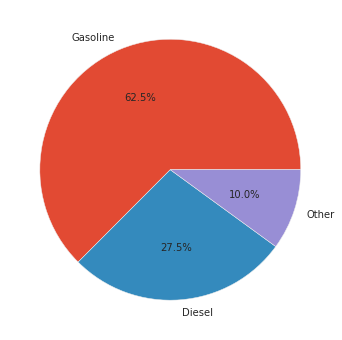

In [ ]:
plt.subplots(figsize=(8,6))
labels = ['Gasoline', 'Diesel', 'Other']
plt.pie(df3.value_counts(), labels = labels, autopct='%1.1f%%')
plt.rcParams.update({'font.size': 20})

*Portanto, podemos concluir que 62,5% dos carros são a gasolina, 27,5% são a diesel, e 9,9% tem outros tipos de combustível.*

**4. Qual o preço médio dos veículos de acordo com o tipo de caixa de câmbio e o tipo de combustível?**

Vamos adicionar na classificação recém-mudada, as variáveis gearbox e price.

In [ ]:
df4 = df3.copy(), df['gearbox'].copy(), df['price'].copy()
df4 = pd.DataFrame(df4)

In [ ]:
df4 = df4.transpose()
df4.head()

,fuelType,gearbox,price
0,Gasoline,manuell,480
1,Diesel,manuell,18300
2,Diesel,automatik,9800
3,Gasoline,manuell,1500
4,Diesel,manuell,3600


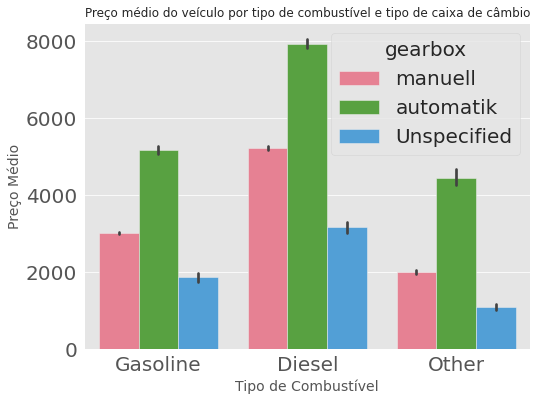

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x="fuelType", y="price", hue="gearbox", palette="husl",data=df4)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

5. Quais os tipos de veículos com a maior potência média?

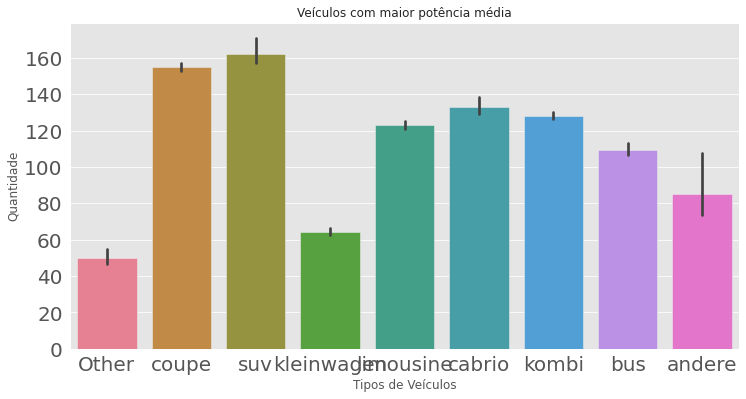

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x="vehicleType", y="powerPS", palette="husl",data=df)
ax.set_title("Veículos com maior potência média",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipos de Veículos",fontdict= {'size':12})
ax.yaxis.set_label_text("Quantidade",fontdict= {'size':12})
plt.rcParams.update({'font.size': 10})
plt.show()

*A partir do gráfico, é possível concluir que os carros tipo SUV (suv) e Cupê (Coupe) são os que possuem a maior potência média. Já os carros tipo supermini (kleinwagen) e outros tipos (other) são os que possuem a menor potência média.*

6. Avalie quantos veículos existem por marca.

In [ ]:
a = df['brand'].value_counts()
a.reset_index()

,index,brand
0,volkswagen,23766
1,opel,12811
2,bmw,11601
3,mercedes_benz,10150
4,audi,8894
5,ford,8105
6,renault,5848
7,peugeot,3679
8,fiat,2954
9,seat,2048


Com o número em mãos, vamo elaborar o gráfico para melhor leitura.

Text(0, 0.5, 'Marca')

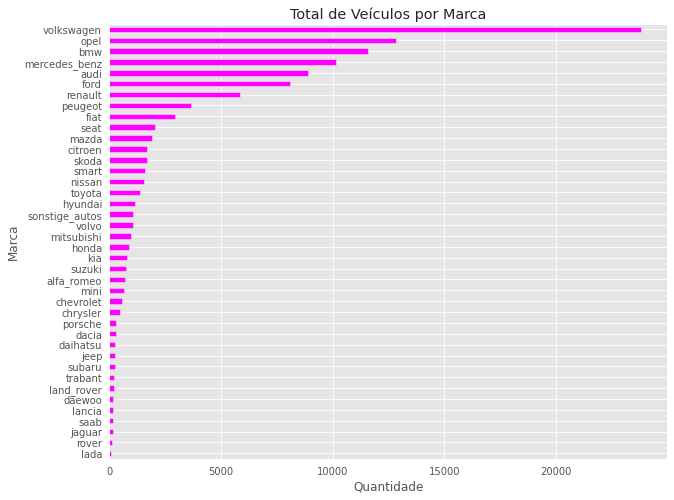

In [ ]:
ax = plt.subplots(figsize = (10,8))
a.sort_values(ascending = True).plot.barh(title = "Total de Veículos por Marca", color = "magenta")
plt.xlabel("Quantidade")
plt.ylabel("Marca")

Muito obrigado por ter apreciado meu projeto!

Fique à vontade para conferir outros projetos no meu [GitHub](https://github.com/gbrmarcos) ou visitar meu perfil no [LinkedIn](https://www.linkedin.com/in/gbrmarcos/).

Um grande abraço!
